In [23]:
print('##### Logistic Regression on Wisconsin Breast Cancer Data #####')

print('----- Importing required libraries & modules-----')

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import scipy

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.special import expit

##### Logistic Regression on Wisconsin Breast Cancer Data #####
----- Importing required libraries & modules-----


In [24]:
print('----- Importing dataset -----')
data = pd.read_csv('bcwd.csv', header=None)

data.columns = ['sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion',              'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
feature_columns = ['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion',              'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']



print ('Imported Rows, Columns - ', data.shape)
print ('Data Head :')
data.head()

----- Importing dataset -----
('Imported Rows, Columns - ', (699, 11))
Data Head :


,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [25]:
missingRemovedData =  data[data['bare_nuclei'] != '?'] # remove rows with missing data

X = missingRemovedData[feature_columns]
y = missingRemovedData['class']

# split X and y into training and teting sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

#Implemnt KNN model

knnModel = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knnModel.fit(X_train, y_train)

y_pred = knnModel.predict(X_test)

from sklearn import metrics

print("Accuracy:  %.2f%%",metrics.accuracy_score(y_test, y_pred)*100.0)

print("\n Confusion Matrix")

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


('Accuracy:  %.2f%%', 98.33333333333333)

 Confusion Matrix
[[150   1]
 [  3  86]]
              precision    recall  f1-score   support

           2       0.98      0.99      0.99       151
           4       0.99      0.97      0.98        89

   micro avg       0.98      0.98      0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



In [26]:
from sklearn.naive_bayes import GaussianNB

#Implements NB model
nbModel = GaussianNB()

nbModel.fit(X_train, y_train)

y_pred = nbModel.predict(X_test)

from sklearn import metrics

print("Accuracy:  %.2f%%",metrics.accuracy_score(y_test, y_pred)*100.0)

('Accuracy:  %.2f%%', 97.08333333333333)


not implemented!
('Classification accuracy: %.2f%%', 95.71106094808127)


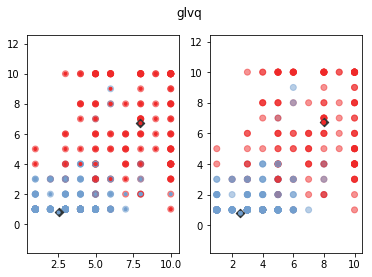

In [27]:
from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d

glvq = GlvqModel()
glvq.fit(X_train, y_train)
plot2d(glvq, X_train, y_train, 1, 'glvq')

print('Classification accuracy: %.2f%%', glvq.score(X_train, y_train)*100.0)
plt.show()

In [28]:
from neupy import algorithms

print('----- Importing dataset -----')
data1 = pd.read_csv('bcwd_lvq.csv', header=None)

data1.columns = ['sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion',              'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
feature_columns1 = ['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion',              'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']


missingRemovedData1 =  data1[data1['bare_nuclei'] != '?'] # remove rows with missing data

X1 = missingRemovedData1[feature_columns1]
y1 = missingRemovedData1['class']

# split X and y into training and teting sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.35)

lvqnet = algorithms.LVQ(n_inputs=9, n_classes=2)
lvqnet.train(X1_train, y1_train, epochs=100)
y1_pred = lvqnet.predict(X1_test)

from sklearn import metrics

print("Accuracy:  %.2f%%",metrics.accuracy_score(y1_test, y1_pred)*100.0)

----- Importing dataset -----


('Accuracy:  %.2f%%', 96.25)
